In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, confusion_matrix
from sklearn.inspection import permutation_importance

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# Load the Telco Customer Churn dataset
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn (1).csv')
data.replace(' ', np.nan, inplace=True)  # replace blank values with NaN
data.dropna(inplace=True)  # drop rows with missing values
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])  # convert TotalCharges column to numeric type


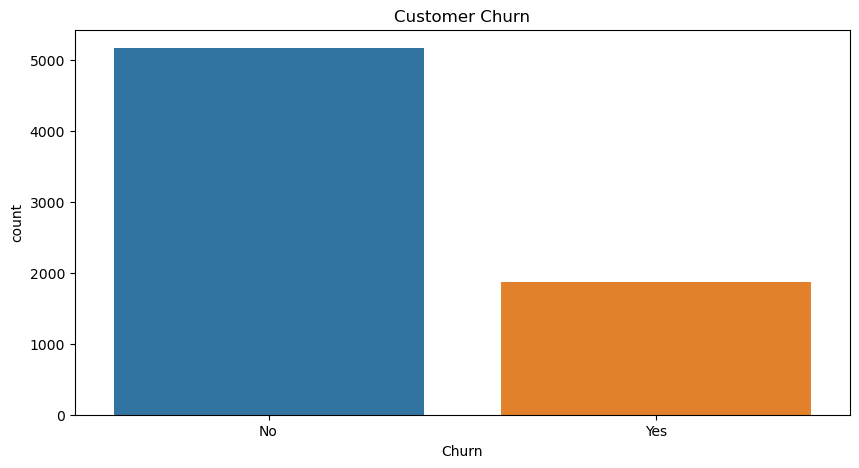

(7032, 21)

In [3]:
# Plotting Churn Distribution
plt.figure(figsize=(10,5))
sns.countplot(x='Churn', data=data)
plt.title('Customer Churn')
plt.show()

data.shape


In [4]:
#Data Engineering
data = pd.get_dummies(data, columns = ['gender', 'InternetService', 'Partner', 'Contract', 'PaymentMethod'])

#Converting data into binary values
data['Dependents'].replace({'Yes': 1, 'No': 0}, inplace = True)
data['PhoneService'].replace({'Yes': 1, 'No': 0}, inplace = True)
data['MultipleLines'].replace({'Yes': 1, 'No': 0, 'No phone service': -1}, inplace = True)
data['OnlineSecurity'].replace({'Yes': 1, 'No': 0, 'No internet service': -1}, inplace = True)
data['OnlineBackup'].replace({'Yes': 1, 'No': 0, 'No internet service': -1}, inplace = True)
data['DeviceProtection'].replace({'Yes': 1, 'No': 0, 'No internet service': -1}, inplace = True)
data['TechSupport'].replace({'Yes': 1, 'No': 0, 'No internet service': -1}, inplace = True)
data['StreamingTV'].replace({'Yes': 1, 'No': 0, 'No internet service': -1}, inplace = True)
data['StreamingMovies'].replace({'Yes': 1, 'No': 0, 'No internet service': -1}, inplace = True)
data['PaperlessBilling'].replace({'Yes': 1, 'No': 0}, inplace = True)

In [5]:
# convert Churn column to binary values

data['Churn'].replace({'Yes': 1, 'No': 0}, inplace=True) 

y = data['Churn']

data['NumServices'] = data.iloc[:, 4:12].sum(axis=1)  # create new feature NumServices

data['TenureMonths'] = data['tenure'] / 12  # create new feature TenureMonths


data.drop(['Churn', 'customerID'], axis = 1, inplace = True)

X = data


Logistic Regression: Accuracy=0.7882, Precision=0.6226, Recall=0.5160, F1-score=0.5643
Confusion Matrix for Logistic Regression:
[[916 117]
 [181 193]]


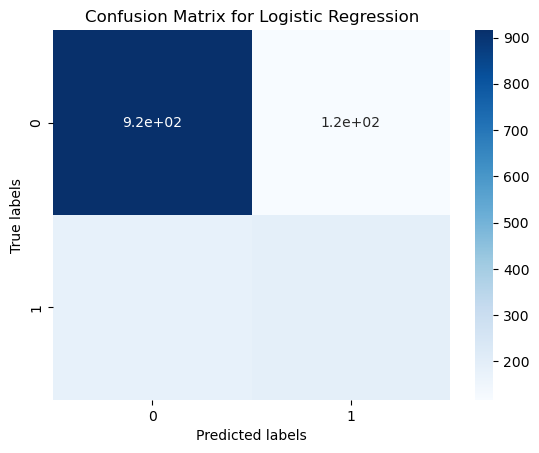

Decision Tree: Accuracy=0.7129, Precision=0.4625, Recall=0.4947, F1-score=0.4780
Confusion Matrix for Decision Tree:
[[818 215]
 [189 185]]


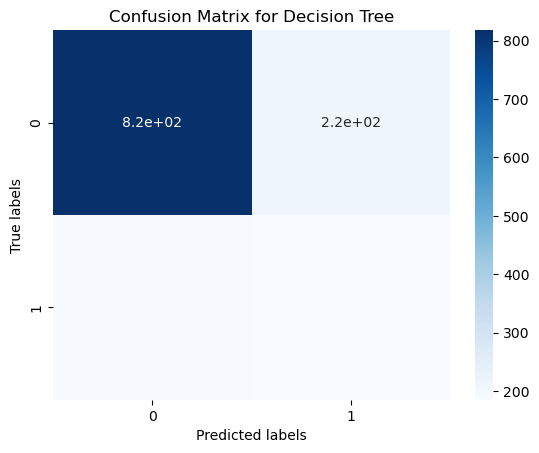

Random Forest: Accuracy=0.7783, Precision=0.6099, Recall=0.4599, F1-score=0.5244
Confusion Matrix for Random Forest:
[[923 110]
 [202 172]]


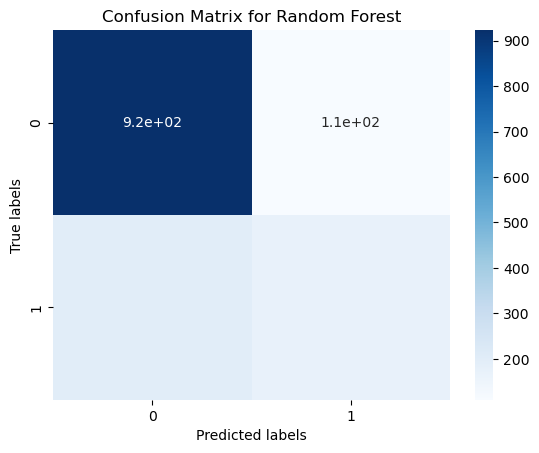

Support Vector Machine: Accuracy=0.7953, Precision=0.6361, Recall=0.5374, F1-score=0.5826
Confusion Matrix for Support Vector Machine:
[[918 115]
 [173 201]]


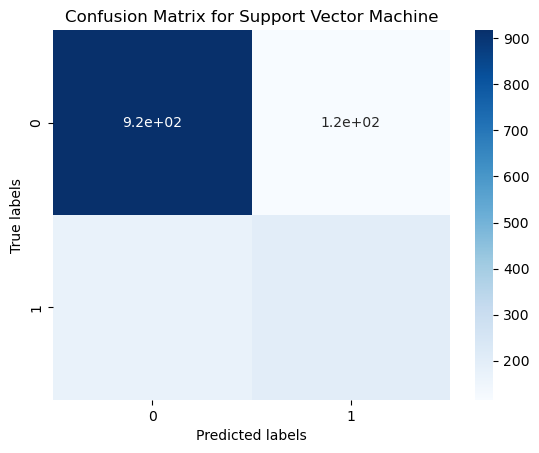

In [6]:
#Dividing data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)#Standardizing the data
X_test_s = scaler.transform(X_test)



models = {'Logistic Regression': LogisticRegression(),
          'Decision Tree': DecisionTreeClassifier(),
          'Random Forest': RandomForestClassifier(),
          'Support Vector Machine': SVC(kernel = 'linear')}

results = {}

log_reg = models['Logistic Regression']
des_tree = models['Decision Tree']
ran_for = models['Random Forest']
sup_mac = models['Support Vector Machine']

for name, model in models.items():
    
    model.fit(X_train_s, y_train)
    y_pred = model.predict(X_test_s)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'{name}: Accuracy={accuracy:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1-score={f1:.4f}')
    
    print(f'Confusion Matrix for {name}:')
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    sns.heatmap(cm, annot=True, cmap='Blues')
    plt.title("Confusion Matrix for {}".format(name))
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()
    
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}
    

{'Logistic Regression': {'Accuracy': 0.7882018479033405, 'Precision': 0.6225806451612903, 'Recall': 0.516042780748663, 'F1-score': 0.5643274853801169}, 'Decision Tree': {'Accuracy': 0.7128642501776831, 'Precision': 0.4625, 'Recall': 0.4946524064171123, 'F1-score': 0.4780361757105943}, 'Random Forest': {'Accuracy': 0.7782515991471215, 'Precision': 0.6099290780141844, 'Recall': 0.45989304812834225, 'F1-score': 0.5243902439024389}, 'Support Vector Machine': {'Accuracy': 0.7953091684434968, 'Precision': 0.6360759493670886, 'Recall': 0.5374331550802139, 'F1-score': 0.5826086956521739}}


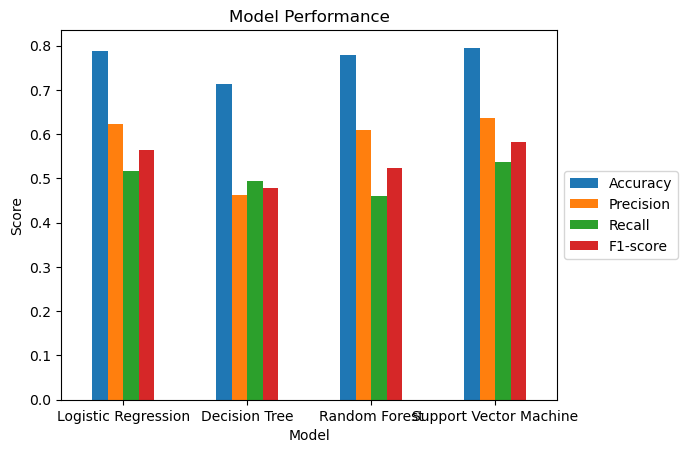

In [7]:
#Stroing results in a dataframe
data_results = pd.DataFrame.from_dict(results, orient='index')
print(results)
#Plotting results
data_results.plot(kind='bar', rot=0)
plt.title('Model Performance')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [8]:
# Retrieve the coefficients or feature importance from the logistic regression model
feature_importance = np.abs(log_reg.coef_[0])

# Associate the coefficients with the feature names
feature_names = X.columns

# Sort the features based on their importance
sorted_indices = np.argsort(feature_importance)
sorted_names = feature_names[sorted_indices]
sorted_importance = feature_importance[sorted_indices]

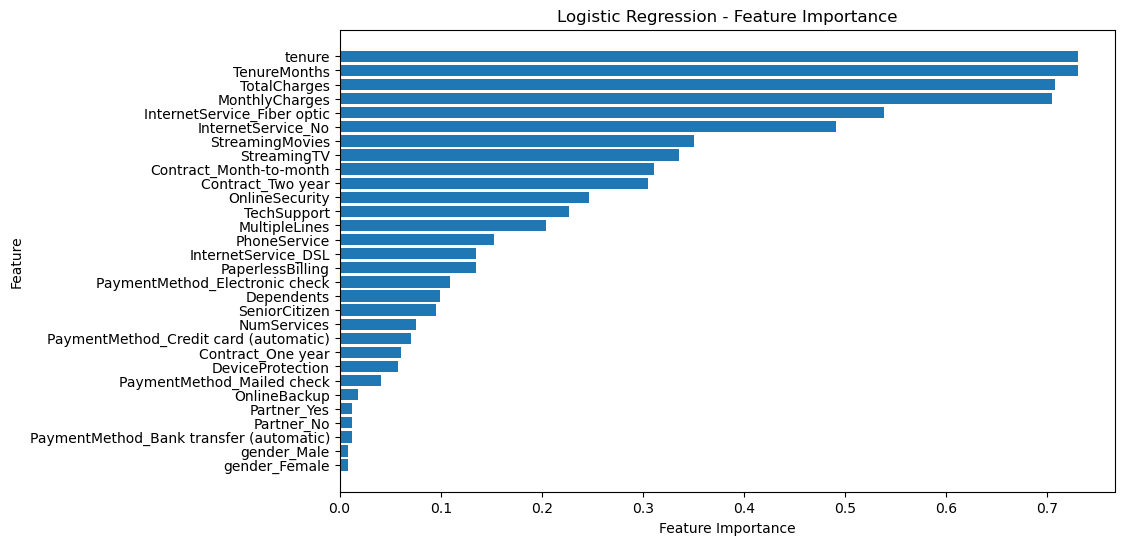

In [9]:
# Plot the feature importance in a bar graph
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_importance)), sorted_importance, align='center')
plt.yticks(range(len(sorted_importance)), sorted_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Logistic Regression - Feature Importance')
plt.show()

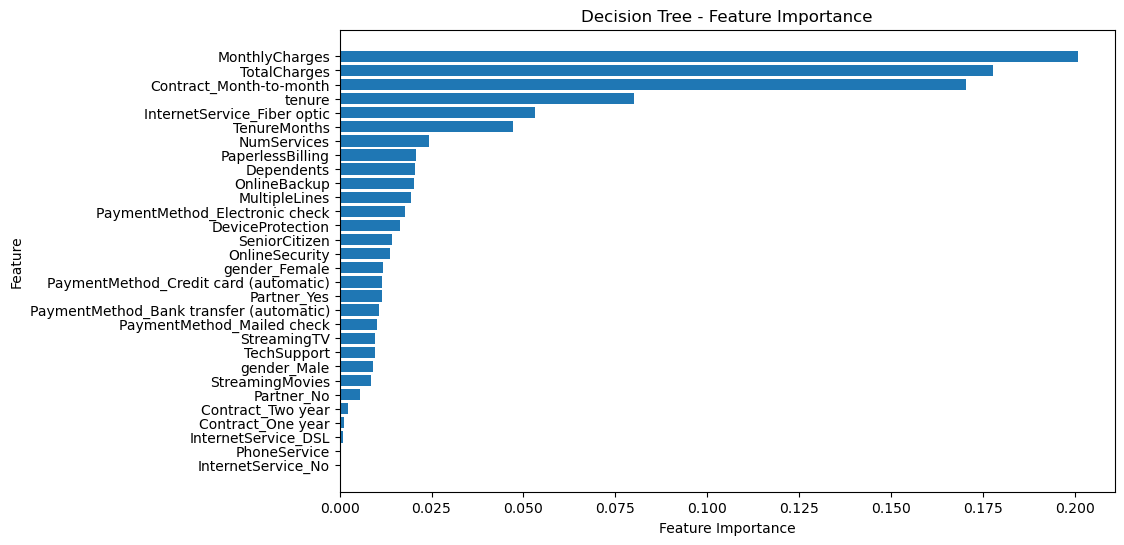

In [10]:
# For Decision Tree

# Retrieve the coefficients or feature importance from the logistic regression model
feature_importance = des_tree.feature_importances_

# Associate the coefficients with the feature names
feature_names = X_train.columns

# Sort the features based on their importance
sorted_indices = np.argsort(feature_importance)
sorted_names = feature_names[sorted_indices]
sorted_importance = feature_importance[sorted_indices]

# Plot the feature importance in a bar graph
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_importance)), sorted_importance, align='center')
plt.yticks(range(len(sorted_importance)), sorted_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree - Feature Importance')
plt.show()

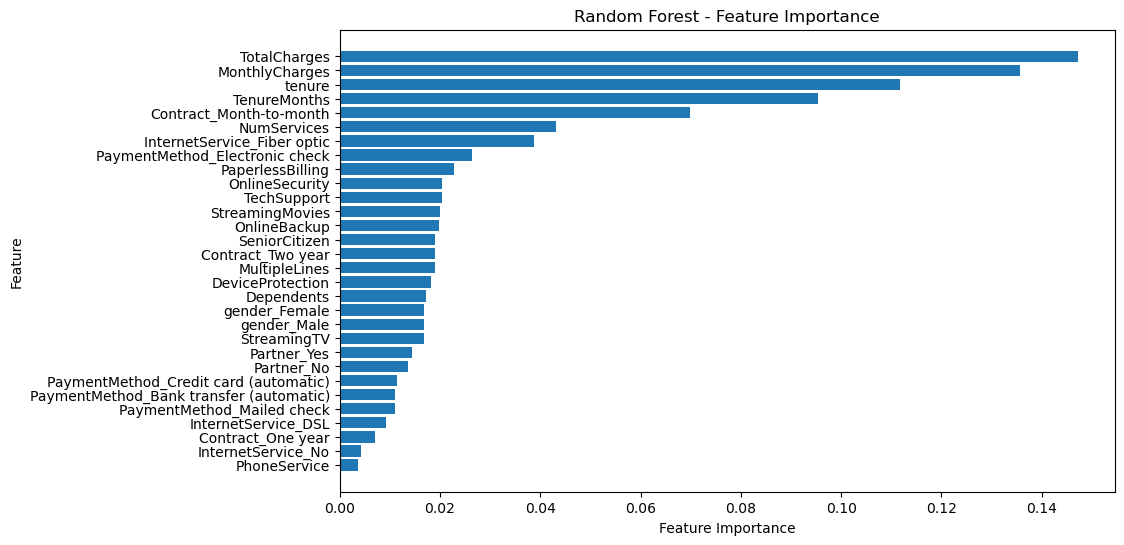

In [11]:
# Random Forest

# Retrieve the coefficients or feature importance from the logistic regression model
feature_importance = ran_for.feature_importances_

# Associate the coefficients with the feature names
feature_names = X_train.columns

# Sort the features based on their importance
sorted_indices = np.argsort(feature_importance)
sorted_names = feature_names[sorted_indices]
sorted_importance = feature_importance[sorted_indices]

# Plot the feature importance in a bar graph
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_importance)), sorted_importance, align='center')
plt.yticks(range(len(sorted_importance)), sorted_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest - Feature Importance')
plt.show()

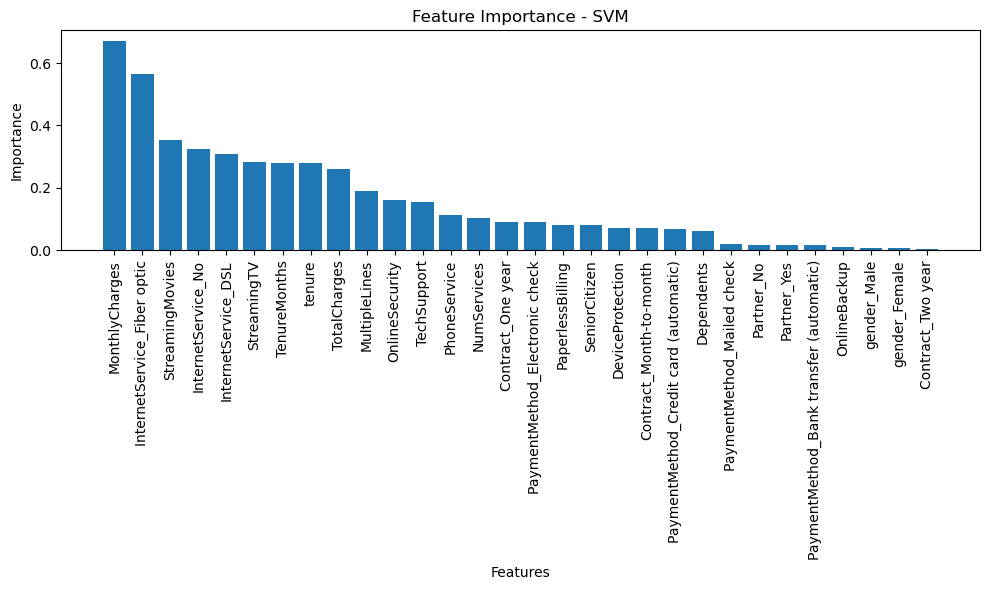

In [12]:
# SVM

# Retrieve the coefficients or feature importance from the logistic regression model

feature_importances = np.abs(sup_mac.coef_[0])

# Sort the feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances)
plt.xticks(range(len(sorted_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance - SVM')
plt.tight_layout()
plt.show()

/Users/nikithareddy/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/nikithareddy/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

/Users/nikithareddy/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


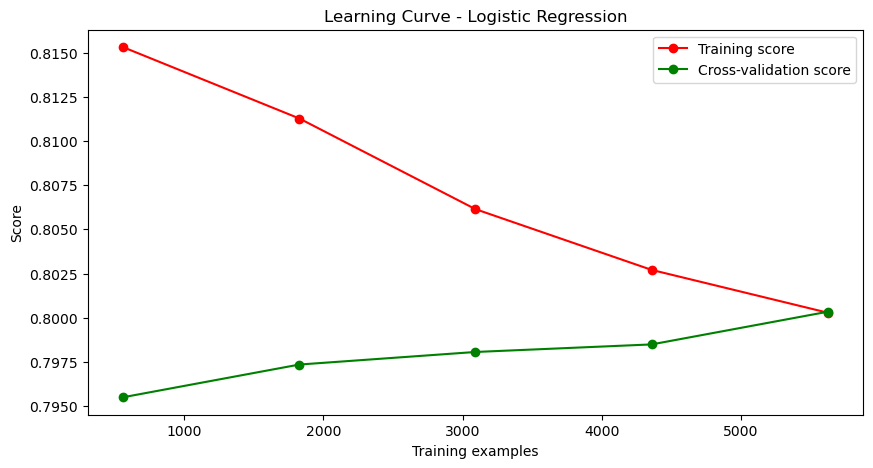

In [13]:
############## Plotting Learning Curve ######################

#Logistic Regression

plt.figure(figsize=(10,5))
train_sizes, train_scores, test_scores = learning_curve(log_reg, X, y, cv = 5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.title("Learning Curve - Logistic Regression")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

[[0.73276475 0.7384506  0.74893314 0.73470839 0.73186344]
 [0.72992182 0.73773987 0.72901849 0.72901849 0.72688478]
 [0.72565743 0.74484719 0.71621622 0.73328592 0.73186344]
 [0.71783937 0.73702914 0.71337127 0.72403983 0.73044097]
 [0.71215352 0.73987207 0.73541963 0.72617354 0.72901849]]


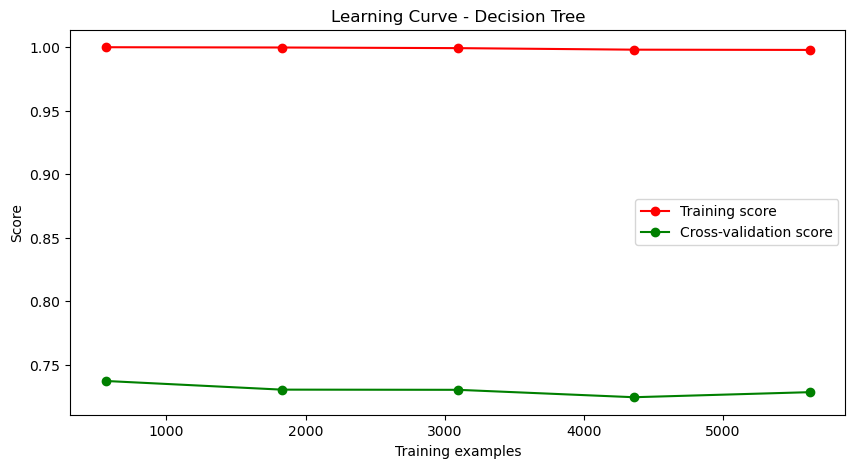

In [14]:
# Decision Tree

plt.figure(figsize=(10,5))
train_sizes, train_scores, test_scores = learning_curve(des_tree, X, y, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
print(test_scores)
test_scores_mean = np.mean(test_scores, axis=1)
plt.title("Learning Curve - Decision Tree")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()


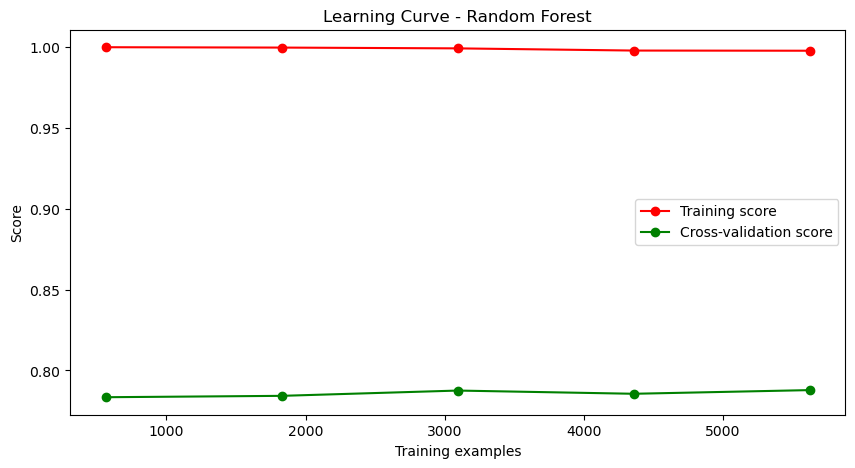

In [15]:
#Random Forest

plt.figure(figsize=(10,5))
train_sizes, train_scores, test_scores = learning_curve(ran_for, X, y, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.title("Learning Curve - Random Forest")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

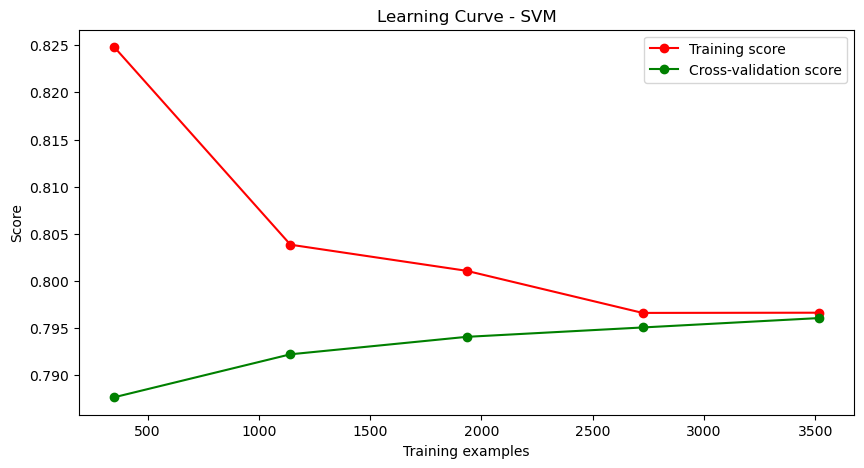

In [16]:
#SVM
plt.figure(figsize=(10,5))
train_sizes, train_scores, test_scores = learning_curve(sup_mac, X, y, cv = 2)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.title("Learning Curve - SVM")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

/Users/nikithareddy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


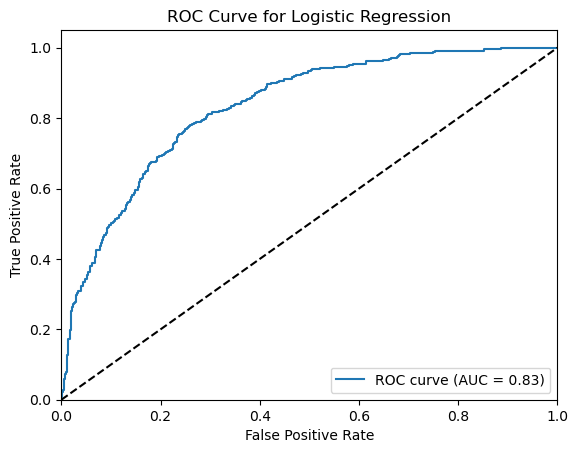

In [17]:
######## Plotting ROC Curve #######################
#Logistic Regression

y_pred = log_reg.predict(X_test)

y_pred_proba = log_reg.predict_proba(X_test_s)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

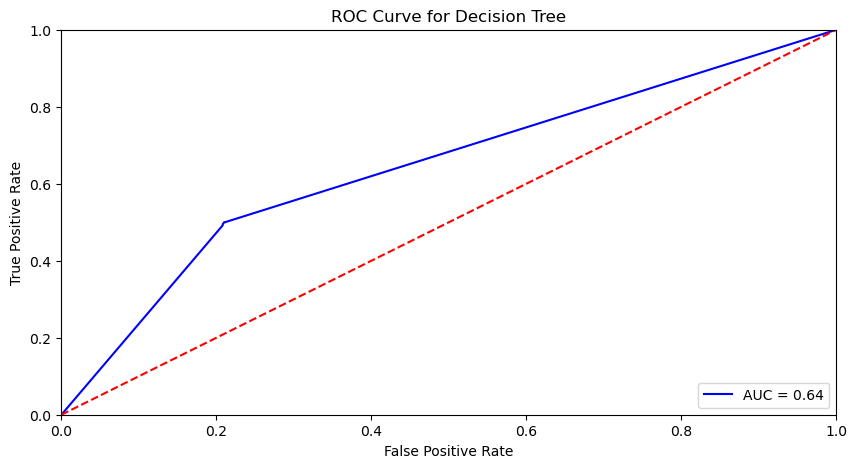

In [18]:
#Decision Tree

plt.figure(figsize=(10,5))
y_pred_proba = des_tree.predict_proba(X_test_s)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.title('ROC Curve for Decision Tree')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

/Users/nikithareddy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


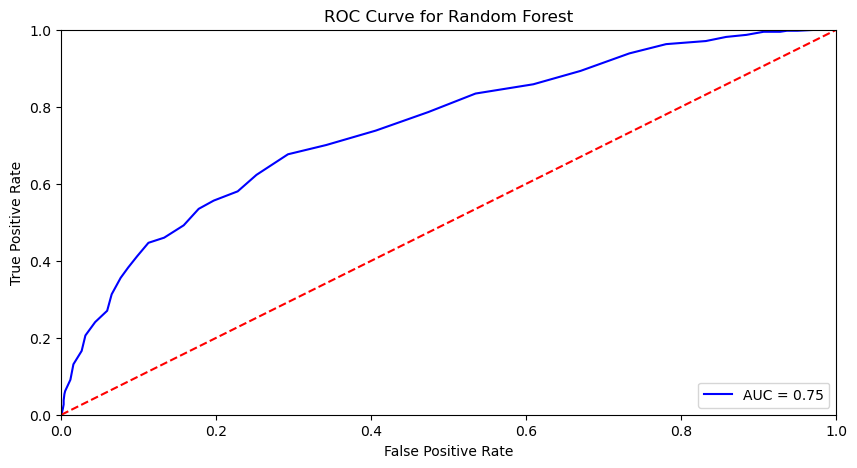

In [19]:
# Random Forest

plt.figure(figsize=(10,5))
y_pred_proba = ran_for.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.title('ROC Curve for Random Forest')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

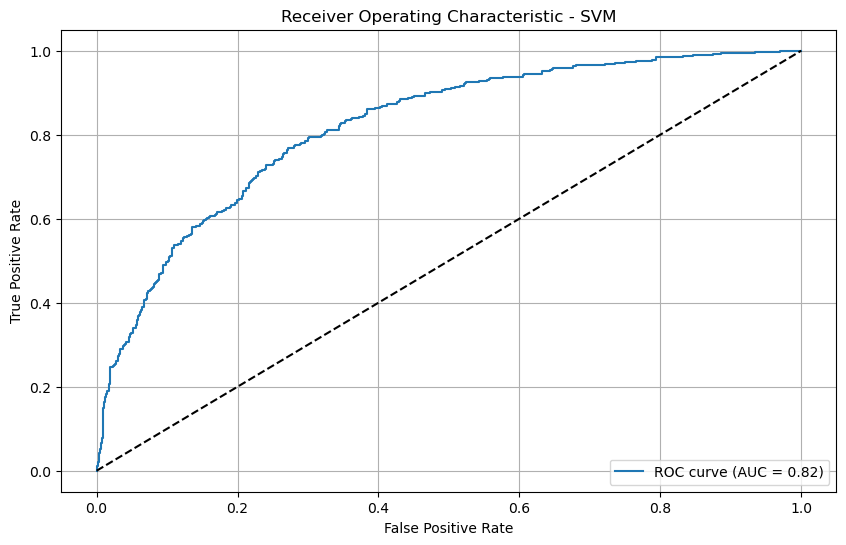

In [20]:
# SVM

# Calculate the predicted probabilities for the positive class (class 1)
y_scores = sup_mac.decision_function(X_test_s)

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Plot the random guessing curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - SVM')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


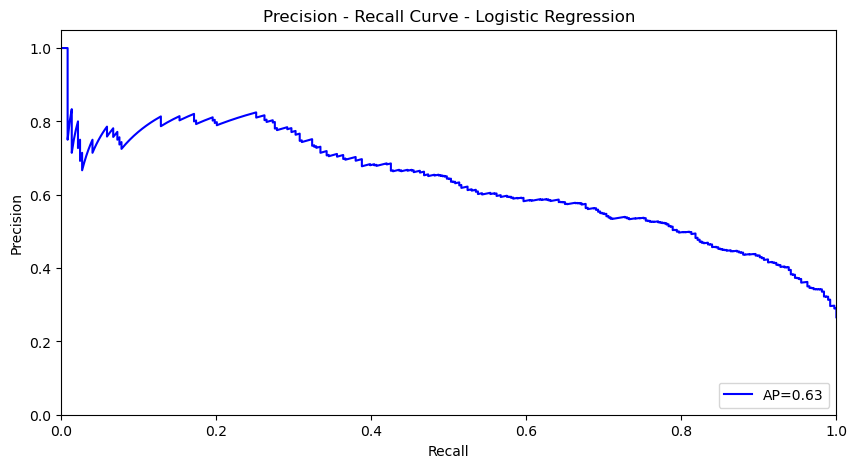

In [21]:
############# Plotting Precision - Recall Curve ########################

#LOGISTIC REGRESSION

plt.figure(figsize=(10,5))
y_pred_proba = log_reg.predict_proba(X_test_s)[:,1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)
plt.plot(recall, precision, 'b', label='AP={0:0.2f}'.format(average_precision))
plt.title("Precision - Recall Curve - Logistic Regression")
plt.legend(loc='lower right')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

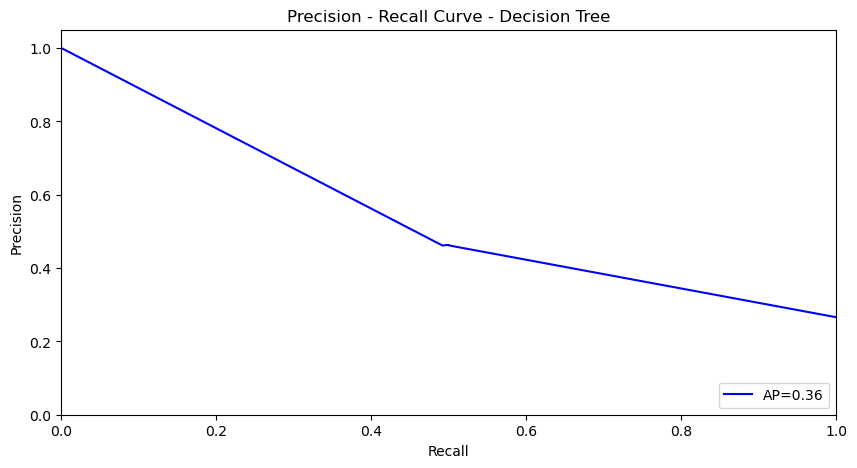

In [22]:
# Decision Tree

plt.figure(figsize=(10,5))
y_pred_proba = des_tree.predict_proba(X_test_s)[:,1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)
plt.plot(recall, precision, 'b', label='AP={0:0.2f}'.format(average_precision))
plt.title("Precision - Recall Curve - Decision Tree")
plt.legend(loc='lower right')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

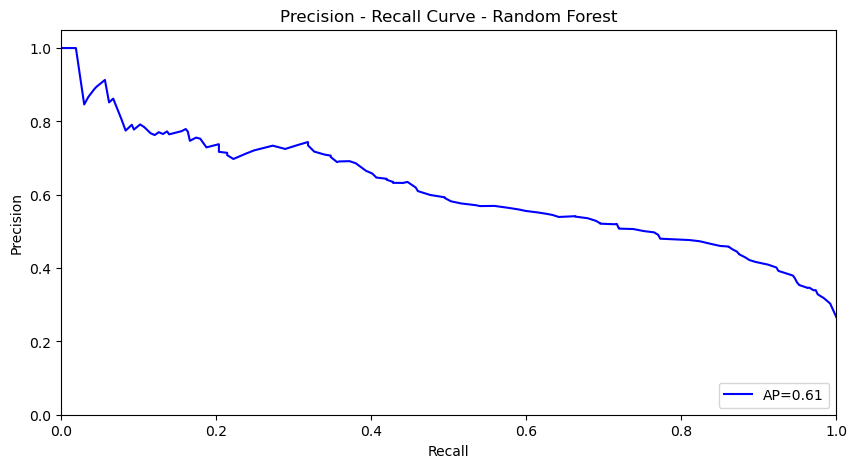

In [23]:
#Random Forest

plt.figure(figsize=(10,5))
y_pred_proba = ran_for.predict_proba(X_test_s)[:,1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)
plt.plot(recall, precision, 'b', label='AP={0:0.2f}'.format(average_precision))
plt.title("Precision - Recall Curve - Random Forest")
plt.legend(loc='lower right')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()


/Users/nikithareddy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


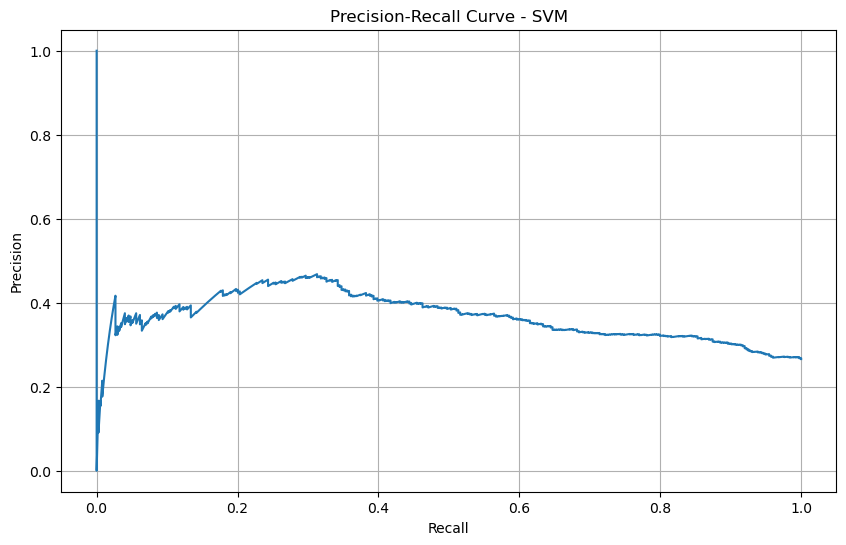

In [24]:
# SVM
y_scores = sup_mac.decision_function(X_test)

# Calculate precision and recall values
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Plot the precision-recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - SVM')
plt.grid(True)
plt.show()